In [19]:
from sktime.utils.plotting                      import plot_series
from sktime.forecasting.compose                 import RecursiveTabularRegressionForecaster
from sktime.forecasting.base                    import ForecastingHorizon
from sktime.transformations.compose             import FeatureUnion
from sktime.transformations.series.date         import DateTimeFeatures
from sktime.transformations.series.difference   import Differencer
from sktime.transformations.series.lag          import Lag
from sktime.forecasting.model_selection         import temporal_train_test_split
from sktime.datasets                            import load_airline
from sklearn.linear_model                       import Ridge

import warnings

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

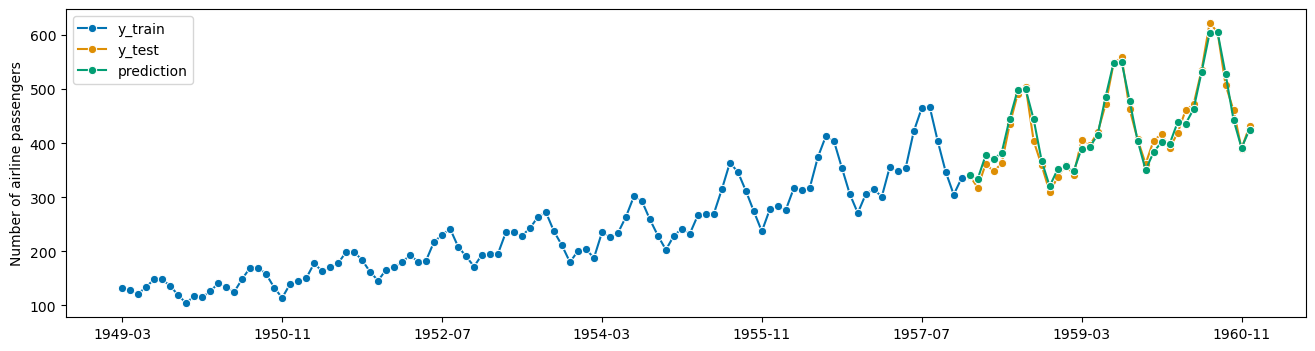

In [22]:
warnings.filterwarnings('ignore')

y = load_airline()

p = FeatureUnion(
    [
        ("diff", Differencer()), 
        ("lag", Lag([1,2], index_out="original")), 
        ("datetime", DateTimeFeatures(ts_freq="M", feature_scope="minimal")) #gives 2 features
    ]
)
x = p.fit_transform(y)
x = x.dropna()
y = y[x.index]

y_train, y_test, x_train, x_test = temporal_train_test_split(y,x)

autoregressive_features = 12
f = RecursiveTabularRegressionForecaster(estimator=Ridge(),window_length=autoregressive_features)
f.fit(y_train,X=x_train)

fh = ForecastingHorizon(y_test.index, is_relative=False)
prediction=f.predict(fh=fh,X=x_test) #DATALEAKAGE, you can't pass the X_test to the predict method!
plot_series(y_train,y_test,prediction,labels=["y_train", "y_test","prediction"])

In [23]:
f.get_fitted_params()

{'estimator': Ridge(),
 'transformers': None,
 'window_length': 12,
 'estimator__coef': array([ 1.03061346e-01,  7.43924393e-02, -1.78257170e-02,  1.85939612e-02,
        -3.22113522e-03, -1.67335458e-02, -7.08424571e-04,  1.80922621e-02,
        -1.71915091e-02,  1.34138844e-02,  1.54327631e-01,  4.22287311e-01,
         1.49852964e-01, -2.86689066e-02, -9.22181562e-02,  3.64196785e-02,
        -2.18150965e-02, -1.35124104e-02,  1.60251209e-02,  1.88006867e-02,
        -3.52837715e-02,  3.06053936e-02,  1.40913747e-01,  2.67959679e-01,
        -4.67916186e-02,  1.03061346e-01,  7.43924393e-02, -1.78257171e-02,
         1.85939612e-02, -3.22113521e-03, -1.67335457e-02, -7.08424603e-04,
         1.80922621e-02, -1.71915091e-02,  1.34138843e-02,  1.54327631e-01,
        -2.75250879e-01, -4.67916187e-02,  1.03061346e-01,  7.43924393e-02,
        -1.78257170e-02,  1.85939612e-02, -3.22113522e-03, -1.67335457e-02,
        -7.08424597e-04,  1.80922621e-02, -1.71915091e-02,  1.34138843e-02,
 

The RecursiveTabularRegressionForecaster does the recursive windwo sampling thing for all the features given to it. Not sure if i can control it not to do it for X. 
Meaning i get 12*6=72 features. 6 features i get from the feature engineering and 12 from the recursive window sampling.

The other question i had is from where does the model have the historic data of x and y to forcast the first day of the test set? I don't pass the historic data in the prediction call. 

Overall this is a good example to learn. I can do some feature engineering and then pass that separetely to the model as X. And i can look at the feature engineering and debug that. 
How can i do that in a Pipeline? I should ask this in the forum.! 

This notebook is **not** a valid forecasting example! The test X can't be used to predict. It contains the target values.